In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import joblib
df = pd.read_csv('D:/Data Science/Extra Projects/Customer Churn prediction/Data & Resources/Data/Customer_Data.csv')
df.head()


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [60]:
df['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Joined      411
Name: count, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [62]:
df_test = df[df['Customer_Status']==('Joined')]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 17 to 6406
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  411 non-null    object 
 1   Gender                       411 non-null    object 
 2   Age                          411 non-null    int64  
 3   Married                      411 non-null    object 
 4   State                        411 non-null    object 
 5   Number_of_Referrals          411 non-null    int64  
 6   Tenure_in_Months             411 non-null    int64  
 7   Value_Deal                   160 non-null    object 
 8   Phone_Service                411 non-null    object 
 9   Multiple_Lines               379 non-null    object 
 10  Internet_Service             411 non-null    object 
 11  Internet_Type                244 non-null    object 
 12  Online_Security              244 non-null    object 
 13  Online_Backup          

In [63]:
df = df[df['Customer_Status'].isin(['Churned', 'Stayed'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6007 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               5417 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              4784 non-null   object 
 13  Online_Backup          

In [64]:

# Drop columns that won't be used for prediction
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]
# Encode categorical variables except the target variable
label_encoders={}
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df[col]= label_encoders[col].fit_transform(df[col])

df['Customer_Status']=df['Customer_Status'].map({'Churned':1,'Stayed':0})
X = df.drop('Customer_Status', axis=1)

y = df['Customer_Status']

# Split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=2)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)



In [66]:
# Evaluate the model
confusion_matrix(y_test,y_pred)

array([[987,  67],
       [176, 272]])

In [67]:
# Create confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"""
                  Predicted
                  Stayed(0)  Churned(1)
Actual Stayed(0)  {cm[0,0]}      {cm[0,1]}
      Churned(1)  {cm[1,0]}      {cm[1,1]}
""")

# Calculate precision for each class
precision_0 = cm[0,0] / (cm[0,0] + cm[1,0])  # TP₀/(TP₀ + FP₀)
precision_1 = cm[1,1] / (cm[1,1] + cm[0,1])  # TP₁/(TP₁ + FP₁)

print(f"\nPrecision calculations:")
print(f"Class 0 (Stayed) Precision = {cm[0,0]}/({cm[0,0]} + {cm[1,0]}) = {precision_0:.2f}")
print(f"Class 1 (Churned) Precision = {cm[1,1]}/({cm[1,1]} + {cm[0,1]}) = {precision_1:.2f}")

Confusion Matrix:

                  Predicted
                  Stayed(0)  Churned(1)
Actual Stayed(0)  987      67
      Churned(1)  176      272


Precision calculations:
Class 0 (Stayed) Precision = 987/(987 + 176) = 0.85
Class 1 (Churned) Precision = 272/(272 + 67) = 0.80


In [68]:
# Convert classification report to DataFrame for better readability
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report as DataFrame:")
print(report_df)


Classification Report as DataFrame:
              precision    recall  f1-score      support
0              0.848667  0.936433  0.890392  1054.000000
1              0.802360  0.607143  0.691233   448.000000
accuracy       0.838216  0.838216  0.838216     0.838216
macro avg      0.825514  0.771788  0.790812  1502.000000
weighted avg   0.834855  0.838216  0.830989  1502.000000


In [69]:

importances = rf_model.feature_importances_
print(importances)

[0.00979133 0.06458954 0.01030338 0.04075817 0.03894683 0.04738981
 0.02279326 0.00251665 0.01080917 0.00284622 0.02143695 0.03663696
 0.01357097 0.01587642 0.02888622 0.01237058 0.01357195 0.01049805
 0.00692756 0.12973618 0.01177976 0.01688381 0.07990354 0.13144984
 0.00753479 0.01167715 0.07257264 0.12794224]


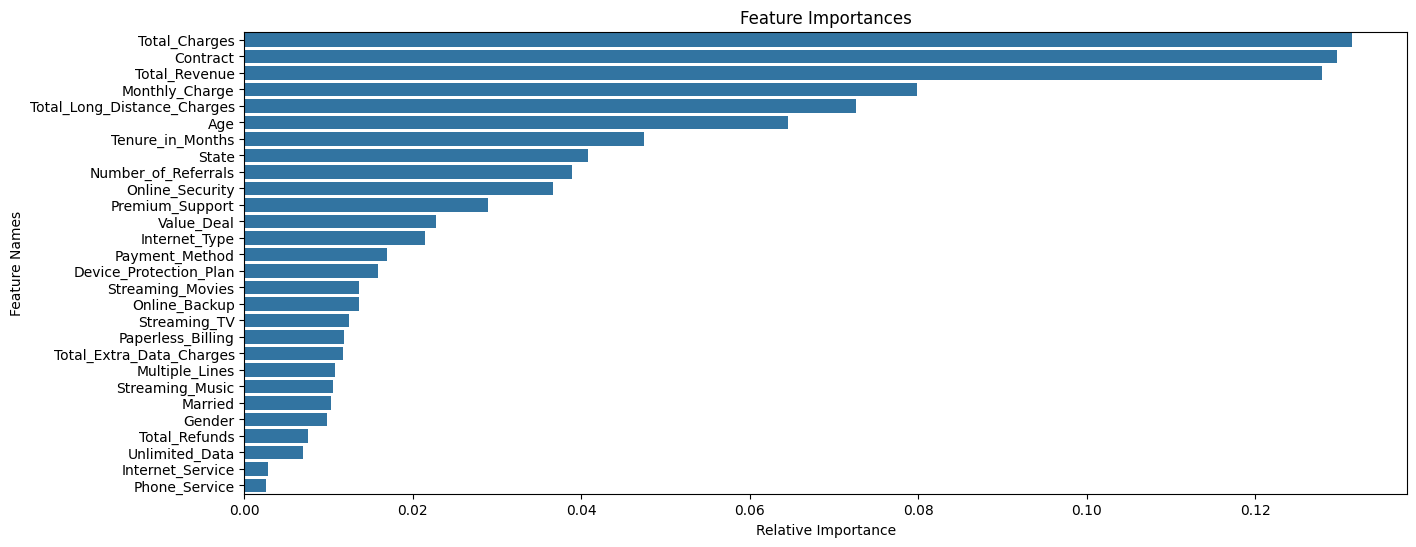

In [70]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

# Use Model for Prediction on New Data

In [71]:

# Retain the original DataFrame to preserve unencoded columns

original_data = df_test.copy()
# Retain the Customer_ID column
new_data = df_test.copy()
customer_ids = new_data['Customer_ID']
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"D:\Data Science\Extra Projects\Customer Churn prediction\Data & Resources\Data\Predictions.csv", index=False)